<a href="https://colab.research.google.com/github/Gurneet-Singh/Python-Programs/blob/main/Copy_of_DS10_Project_1_Pokemon_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<img src="https://static.junilearning.com/images/juni_logo.png" height=75 align=center hspace="5px"> **DS10 Project 1: Pokemon Analysis**

<img src="https://static.junilearning.com/python_data_science/pokemon.jpeg" height=300>

You've decided to use the power of data science to become the greatest Pokemon trainer ever. Pokemon are special creatures that you can catch, train, and battle against each other.

<b>Using statistics and a minimum of three plots, make a compelling case for which type of Pokemon trains the fastest, and which type is the strongest.</b>

Every species of Pokemon has:
* a growth rate 
* base stats
* base experience 

Focus on these statistics when formulating your responses.


API Resource: https://pokeapi.co/

Additional Resources:
* Base Stats: https://bulbapedia.bulbagarden.net/wiki/Base_stats
* Growth Rate and Experience: https://bulbapedia.bulbagarden.net/wiki/
* Pokedex: https://pokedex.org/
* The growth rates aren't included in the regular API calls. You can access information about them here: https://pokeapi.co/docs/v2#growth-rates

Begin by searching the API for relevant data and adding it into a DataFrame. Then describe each of your three plots and why they are relevant to answering the research question.





Student Analysis:


In [ ]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [ ]:
typeList = ['poison', 'fire', 'flying', 'water', 'bug', 'normal', 'electric', 'ground', 'fairy', 'grass', 'fighting', 'psychic', 'steel', 'ice', 'rock', 'dragon', 'dark', 'ghost']
typeListAbv = ['p','f','fl','w','b','n','e','g','fa','gr','fi','p','s','i','r','d','dar','gh']

In [ ]:
PokeDF = pd.DataFrame()
s = []
t = []
be = []
g = []
h = []
a = []
d = []
sa = []
sd = []
sp = []

id = 0
while id < 250:
  id += 1
  url = 'https://pokeapi.co/api/v2/pokemon/' + str(id) + '/'
  r = requests.get(url)
  json_data = json.loads(r.text)
  if r.status_code != 200:
    break

  # species
  s.append(json_data.get("species").get("name"))

  # type
  types = []
  for i in json_data.get("types"):
    i = i.get("type").get("name")
    types.append(i)
  thing = str(types[0])
  t.append(thing)

  # base experience
  be.append(json_data.get("base_experience"))
  
  # hp, attack, defense, special attack, special defense, and speed
  for i in json_data.get("stats"):
    if str(i.get("stat").get("name")) == "hp":
      h.append(i.get("base_stat"))
    if str(i.get("stat").get("name")) == "attack":
      a.append(i.get("base_stat"))
    if str(i.get("stat").get("name")) == "defense":
      d.append(i.get("base_stat"))
    if str(i.get("stat").get("name")) == "special-attack":
      sa.append(i.get("base_stat"))
    if str(i.get("stat").get("name")) == "special-defense":
      sd.append(i.get("base_stat"))
    if str(i.get("stat").get("name")) == "speed":
      sp.append(i.get("base_stat"))

# setting up columns
PokeDF["Species"] = s
PokeDF["Type"] = t
PokeDF["Base Experience"] = be
PokeDF["Growth"] = ""
PokeDF["Health"] = h
PokeDF["Attack"] = a
PokeDF["Defense"] = d
PokeDF["Special-Attack"] = sa
PokeDF["Special-Defense"] = sd
PokeDF["Speed"] = sp

PokeDF = PokeDF.set_index("Species")

In [ ]:
# investigate the 6 different possibilities for growth rates
# url = 'https://pokeapi.co/api/v2/growth-rate/'
# r = requests.get(url)
# data = r.json()
# for x in data["results"]:
#   print(x)

In [ ]:
# growth
for i in range(1,7):
  url = "https://pokeapi.co/api/v2/growth-rate/" + str(i) + "/"
  r = requests.get(url)
  data = r.json()
  for j in range(len(data['pokemon_species'])):
    key = data['pokemon_species'][j]['name']
    for name in PokeDF.index:
      if key in name:
        PokeDF.loc[name, "Growth"] = data["name"]
display(PokeDF)

,Type,Base Experience,Growth,Health,Attack,Defense,Special-Attack,Special-Defense,Speed
Species,,,,,,,,,
bulbasaur,grass,64,medium-slow,45,49,49,65,65,45
ivysaur,grass,142,medium-slow,60,62,63,80,80,60
venusaur,grass,236,medium-slow,80,82,83,100,100,80
charmander,fire,62,medium-slow,39,52,43,60,50,65
charmeleon,fire,142,medium-slow,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
larvitar,rock,60,slow,50,64,50,45,50,41
pupitar,rock,144,slow,70,84,70,65,70,51
tyranitar,rock,270,slow,100,134,110,95,100,61


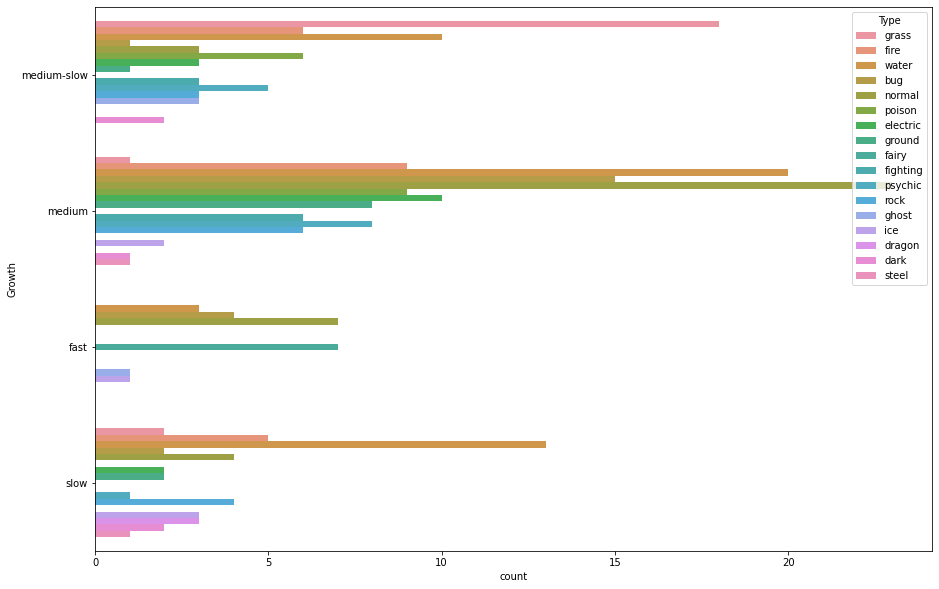

In [ ]:
plt.figure().set_size_inches(15, 10)
sns.countplot(y = "Growth", data = PokeDF, hue = "Type")
plt.show()

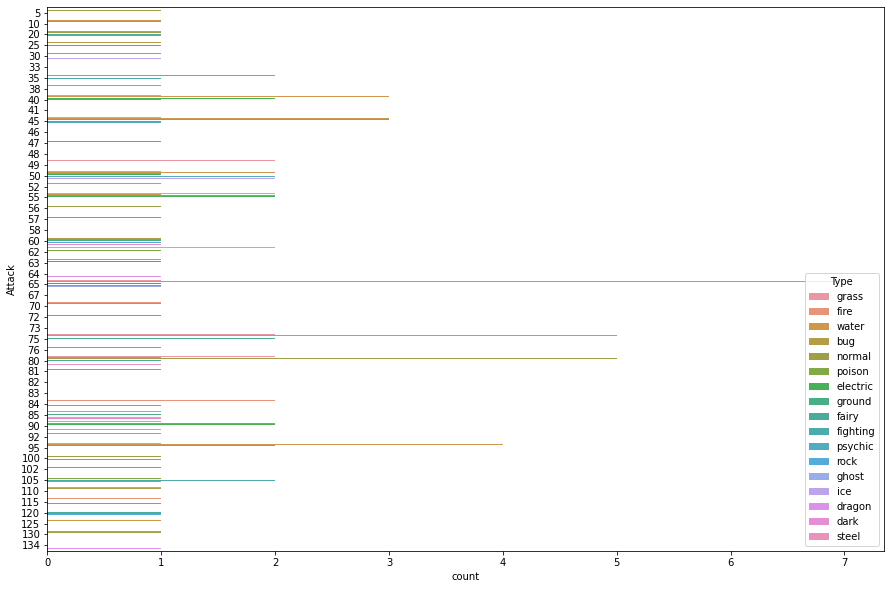

In [ ]:
plt.figure().set_size_inches(15, 10)
sns.countplot(y = "Attack", data = PokeDF, hue = "Type")
plt.show()

In [ ]:
stats = ["Health", "Attack", "Defense", "Special-Attack", "Special-Defense", "Speed"]
total = [0 for i in range(len(PokeDF))]
for stat in stats:
  total += PokeDF[stat]
total /= len(stats)
PokeDF["Average Stats"] = total

In [ ]:
PokeDF.head()

,Type,Base Experience,Growth,Health,Attack,Defense,Special-Attack,Special-Defense,Speed,Average Stats
Species,,,,,,,,,,
bulbasaur,grass,64,medium-slow,45,49,49,65,65,45,53.0
ivysaur,grass,142,medium-slow,60,62,63,80,80,60,67.5
venusaur,grass,236,medium-slow,80,82,83,100,100,80,87.5
charmander,fire,62,medium-slow,39,52,43,60,50,65,51.5
charmeleon,fire,142,medium-slow,58,64,58,80,65,80,67.5


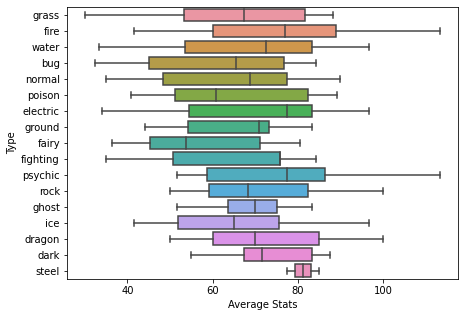

In [ ]:
plt.figure().set_size_inches(7,5)
sns.boxplot(data=PokeDF, x="Average Stats", y="Type")
plt.show()